In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from control.matlab import *

In [2]:
def model(z,u,k,Fext):
    x1 = z[0]
    x2 = z[1]
    x3 = z[2]
    x4 = z[3]
    
    m1 = 0.33 #  kg
    m2 = 2 # kg
    b = 126.0 # Ns/m
    
    
    dx1dt = x2
    dx2dt = -(k/m1)*x1 + (k/m1)*x3 - (b/m1)*x2 + u/m1
    dx3dt = x4
    dx4dt =  (k/m2)*x1-(k/m2)*x3 - Fext/m2
    
    return [dx1dt,dx2dt,dx3dt,dx4dt]

In [3]:
def forwardeuler(dz,z,step):
    z = z + step * dz
    return z


In [4]:
def admittancemodel(x,e,Kd,Dd):
    dx = (e - Kd*x)/Dd
    return dx

In [5]:
def admitcont(Fh,Fmeas,step,posr):
    Kd = 200
    Dd = 1
    dz =  admittancemodel(posr,Fh-Fmeas,Kd,Dd)
    posr =  forwardeuler(dz,posr,step)
    posr = 10*posr
    posrd = dz
    return posr, posrd

In [6]:
#main function

deltat = 0.0001 #time step
tf = 20
ti = 0
n =  int(((tf-ti)/deltat) + 1) # number ıf steps
t = np.linspace(ti,tf,n)
Fext = np.zeros(n)
Fext[101:n] = 100
#Fext = 10*np.sin(t)
z =  np.zeros(4)

k = 50000.0 # Nm
u = 0
posr = 0
uarr = np.zeros(n)
Fmarr = np.zeros(n)
x1 = np.zeros(n)
x2 = np.zeros(n)
x3 = np.zeros(n)
x4 = np.zeros(n)

In [7]:
for i in range(n):
    dz = model(z,u,k,Fext[i])
    dz = np.array(dz)
    z =  forwardeuler(dz, z, deltat)
    Fm = k * (z[0]-z[2])
    u,ud = admitcont(Fext[i],Fm,deltat, posr) 
    
    uarr[i] = u
    Fmarr[i] = Fm
    x1[i] = z[0]
    x2[i] = z[1]
    x3[i] = z[2]
    x4[i] = z[3]

/home/umut/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


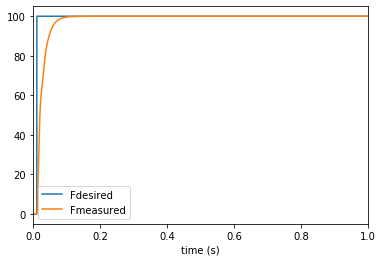

In [8]:
plt.figure(1)
plt.xlabel("time (s)")
plt.xlim(-0.001,1)
plt.plot(t,Fext,label= 'Fdesired')
plt.plot(t,Fmarr,label = 'Fmeasured')
plt.legend()

Energy (J)=  1585.2469971061698


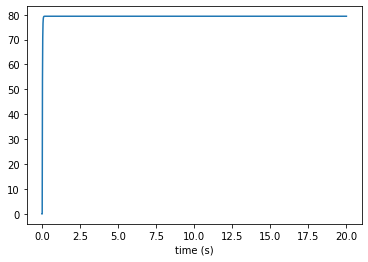

In [9]:
#Energy definition
#instantenous power
power = np.multiply(Fext,-x4)
energy = np.sum(deltat*power)
print("Energy (J)= ", energy)

plt.figure(2)
plt.xlabel("time (s)")
plt.plot(t,power)

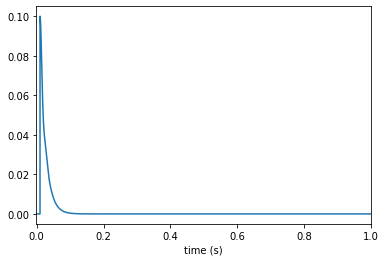

In [10]:
plt.figure(2)
plt.xlim(-0.001,1)
plt.xlabel("time (s)")
plt.plot(t,uarr)

